<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/PyTorch_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collapse

In [ ]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [ ]:
import torch

In [ ]:
x = torch.ones(2, 2, requires_grad = True)

In [ ]:
z = y * 3
out = z.mean()
out

tensor(9., grad_fn=<MeanBackward0>)

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[0.7500, 0.7500],
        [0.7500, 0.7500]])


In [ ]:
with torch.no_grad():
  (x**2).requires_grad

In [ ]:
import torch.nn as nn

In [ ]:
X = torch.ones((64, 3, 256, 256))

In [ ]:
conv = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
import torch
import torchvision

train_set = torchvision.datasets.CIFAR10(
    root = './data', train = True, download = True, transform = transform
)

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 8, shuffle = True, num_workers = 2
)

100%|██████████| 170M/170M [00:02<00:00, 72.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.fc3(x)

In [ ]:
import torch.optim as optim
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
net.train()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for epoch in range(10):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

# Simple Linear Regression Model

In [ ]:
import torch
import torch.nn as nn

In [ ]:
#synthetic data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [ ]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


In [ ]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

    def forward(self, x):
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = SimpleLinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#prediction
with torch.inference_mode():
    y_pred = model_0(X_test)

In [ ]:
import matplotlib.pyplot as plt

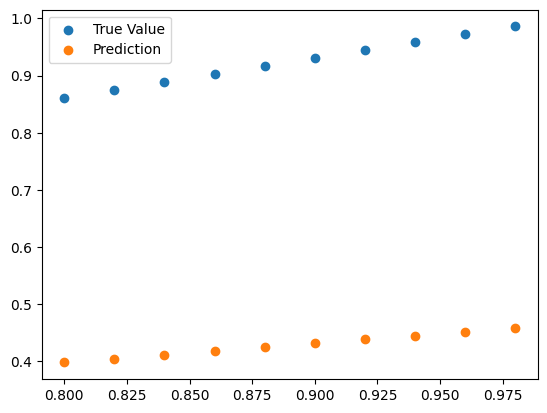

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, label = 'True Value')
ax.scatter(X_test, y_pred, label = 'Prediction')
ax.legend()
plt.show()

In [ ]:
loss_fcn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    #reset model state
    model_0.train()

    #forward propagation
    y_pred = model_0.forward(X_train)

    #calculate loss
    train_loss = loss_fcn(y_pred, y_train)

    #set gradient to zero
    optimizer.zero_grad()

    #back propagation
    train_loss.backward()

    #update weights
    optimizer.step()

    #evaluate on test set
    model_0.eval()

    with torch.inference_mode():
        #test set predictions
        test_pred = model_0(X_test)

        #test loss
        test_loss = loss_fcn(test_pred, y_test.type(torch.float))

        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MSE Train Loss: {train_loss} | MSE Test Loss: {test_loss}')

Epoch: 0 | MSE Train Loss: 0.10493002086877823 | MSE Test Loss: 0.23639337718486786
Epoch: 10 | MSE Train Loss: 0.06683927774429321 | MSE Test Loss: 0.16711154580116272
Epoch: 20 | MSE Train Loss: 0.04299221560359001 | MSE Test Loss: 0.12065689265727997
Epoch: 30 | MSE Train Loss: 0.028054703027009964 | MSE Test Loss: 0.08913629502058029
Epoch: 40 | MSE Train Loss: 0.01869034208357334 | MSE Test Loss: 0.06747110188007355
Epoch: 50 | MSE Train Loss: 0.012812281027436256 | MSE Test Loss: 0.05237375572323799
Epoch: 60 | MSE Train Loss: 0.00911521352827549 | MSE Test Loss: 0.041701000183820724
Epoch: 70 | MSE Train Loss: 0.006782688200473785 | MSE Test Loss: 0.03404407948255539
Epoch: 80 | MSE Train Loss: 0.005304032005369663 | MSE Test Loss: 0.02846846543252468
Epoch: 90 | MSE Train Loss: 0.004359802696853876 | MSE Test Loss: 0.024347715079784393


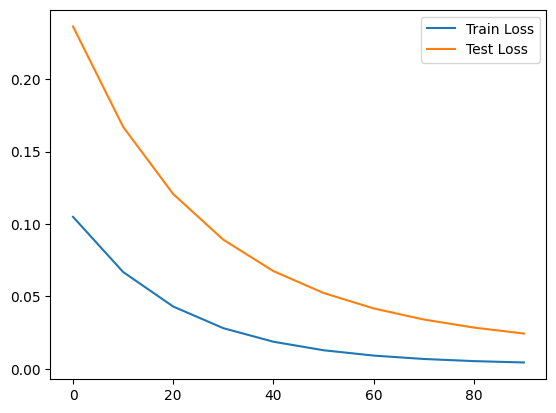

In [ ]:
fig, ax = plt.subplots()
plt.plot(epoch_count, train_loss_values, label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
ax.legend()
plt.show()

In [ ]:
#inspect the updated weights
model_0.state_dict()

OrderedDict([('weights', tensor([0.4600])), ('bias', tensor([0.3675]))])

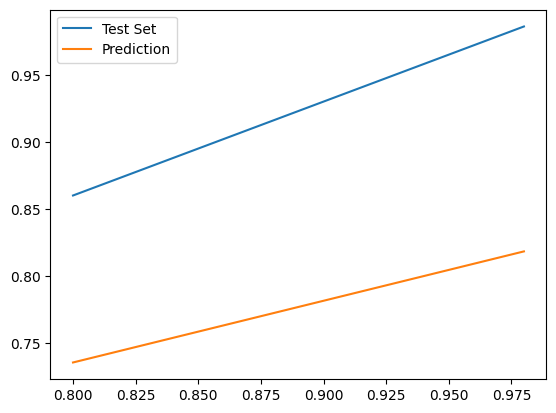

In [ ]:
#Make prediction
model_0.eval()
with torch.inference_mode():
    y_test_pred = model_0(X_test)

fig, ax = plt.subplots()
plt.plot(X_test, y_test, label = 'Test Set')
plt.plot(X_test, y_test_pred, label = 'Prediction')
ax.legend()
plt.show()

In [ ]:
#save the model params
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = '01_SimpleLinearRegressionModel'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving the model to: models/01_SimpleLinearRegressionModel


In [ ]:
!ls -l models/01_SimpleLinearRegressionModel

-rw-r--r-- 1 root root 1698 Nov  9 01:42 models/01_SimpleLinearRegressionModel


In [ ]:
#load the model params
loaded_model_0 = SimpleLinearRegression()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH, weights_only = True))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_pred = loaded_model_0(X_test)

In [ ]:
loaded_model_0_pred == y_test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])